## 1.Êï∞ÊçÆÊ∏ÖÊ¥ó

In [1]:
# ËÆ∞ÂæóÊï∞ÊçÆ‰∏ãËΩΩÂÖà‰øùÂ≠òÁºñÁ†Å‰∏∫utf-8ÔºåÊï∞ÊçÆÊù•Ëá™ https://www.kaggle.com/vijayuv/onlineretail 
import pandas as pd, numpy as np
from datetime import datetime, date
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('OnlineRetail_utf-8.csv')
len(df)

541909

In [2]:
df.sample(10)

InvoiceNo StockCode                         Description  Quantity  \
323897    565378     22666     RECIPE BOX PANTRY YELLOW DESIGN        10   
126675    547094     22993        SET OF 4 PANTRY JELLY MOULDS        24   
154757    549943     37340       MULTICOLOUR SPRING FLOWER MUG         6   
238620    557950    84711B         PINK OVAL SHAPE TRINKET BOX         1   
77836     542789     22255               FELT TOADSTOOL  SMALL        48   
141814    548522     22089       PAPER BUNTING VINTAGE PAISLEY         3   
266244    560248     22960            JAM MAKING SET WITH JARS         2   
456886    575726     84879       ASSORTED COLOUR BIRD ORNAMENT         8   
215554    555722    84596L      BISCUITS SMALL BOWL LIGHT BLUE         2   
145747    548898    72802B  OCEAN SCENT CANDLE IN JEWELLED BOX         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
323897    9/2/2011 15:16       6.63         NaN  United Kingdom  
126675    3/21/2011 8:39       1.25     13934.0  United Kingdom  
154757   4/13/2011 12:09       0.39     13544.0  United Kingdom  
238620   6/23/2011 17:35       9.95     17848.0  United Kingdom  
77836     2/1/2011 10:38       0.85     17511.0  United Kingdom  
141814   3/31/2011 16:43       5.79         NaN  United Kingdom  
266244   7/17/2011 12:24       4.25     16255.0  United Kingdom  
456886  11/10/2011 19:12       1.69     16791.0  United Kingdom  
215554    6/6/2011 16:06       0.83         NaN  United Kingdom  
145747    4/4/2011 16:28       4.25     17214.0  United Kingdom

In [3]:
# Ë¥üÊï∞ÂºÇÂ∏∏Êï∞ÊçÆÂâîÈô§
df = df[(df.Quantity > 0) & (df.UnitPrice > 0)]

In [4]:
# Êü•ÁúãÂêå‰∏ÄËÇ°Á•®‰ª£Á†ÅÁöÑ‰∏çÂêå‰∫ßÂìÅÊèèËø∞ÊúâÂ§öÂ∞ëÁßç
df.groupby('StockCode').Description.nunique().sort_values(ascending=False)

StockCode
23236     4
23196     4
17107D    3
22776     3
23366     3
         ..
46776B    1
46776A    1
46775D    1
46138B    1
10002     1
Name: Description, Length: 3922, dtype: int64

In [5]:
# ÂâîÈô§ÂºÇÂ∏∏‰∫ßÂìÅÊï∞ÊçÆ
df = df[~df.StockCode.isin(['POST', 'DOT', 'M', 'AMAZONFEE', 'BANK CHARGES', 'C2', 'S'])]
len(df)

527794

In [6]:
# Ê∏ÖÊ¥óÊéßÂà∂ÂèòÈáè
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)
df['Date'] = pd.to_datetime(df.InvoiceDate.dt.date)
df['revenue'] = df.Quantity * df.UnitPrice

<AxesSubplot:title={'center':'number of items sold and number of orders over time'}, xlabel='Date'>

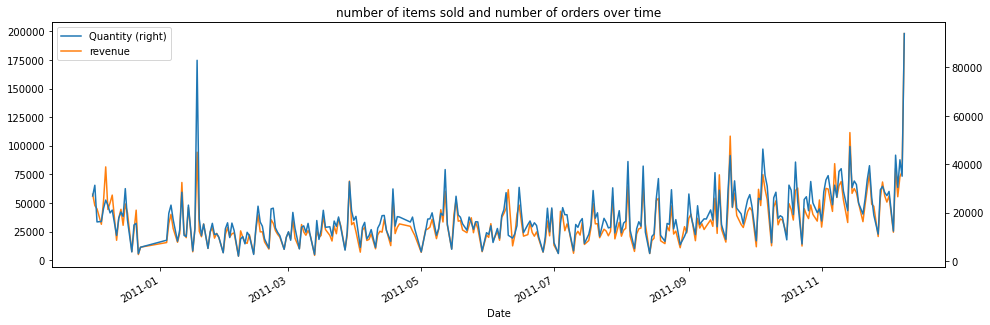

In [7]:
# Êü•ÁúãÊï∞ÊçÆË∂ãÂäø
df.groupby('Date').agg({'Quantity': 'sum', 'revenue': 'sum'}).plot(
    title='number of items sold and number of orders over time', 
    secondary_y='Quantity',
    figsize=(16, 5)
)

<AxesSubplot:title={'center':'number of items sold and number of orders over time'}, xlabel='Date'>

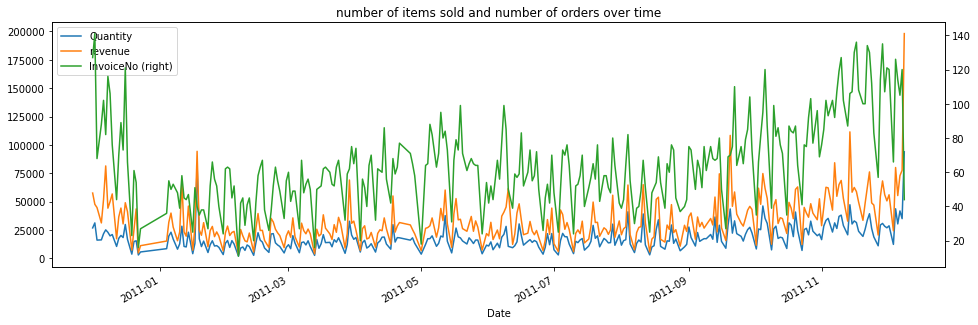

In [8]:
df.groupby('Date').agg({'Quantity': 'sum', 'revenue': 'sum', 'InvoiceNo': 'nunique'}).plot(
    title='number of items sold and number of orders over time', 
    secondary_y='InvoiceNo',
    figsize=(16, 5)
)

In [9]:
# ÂâîÈô§ÂºÇÂ∏∏ÂÅèÂ∑ÆÂÄº
df = (
    df.assign(dNormalPrice=lambda d: d.UnitPrice / d.groupby('StockCode').UnitPrice.transform('median') 
    ).pipe(lambda d: d[(d['dNormalPrice'] > 1./3) &(d['dNormalPrice'] < 3.)]
    ).drop(columns=['dNormalPrice'])
)

In [10]:
df = df.groupby(['Date', 'StockCode', 'Country'], as_index=False).agg({
    'Description': 'first',
    'Quantity': 'sum', 
    'revenue': 'sum'
})
df['Description'] = df.groupby('StockCode').Description.transform('first')
df['UnitPrice'] = df['revenue'] / df['Quantity']

In [11]:
# Ê∏ÖÊ¥óÂÆåÊØïÔºåÊï∞ÊçÆ‰øùÂ≠ò‰∏∫parquet
df.to_parquet('ecom_sample_clean.parquet')

## 2. Âª∫Á´ãÊ®°Âûã

In [12]:
# ËØªÂèñÊï∞ÊçÆ
df = pd.read_parquet('ecom_sample_clean.parquet')

In [13]:
df.set_index(['Date', 'StockCode', 'Country']).sample(5)

Description  Quantity  \
Date       StockCode Country                                                    
2011-12-08 21929     United Kingdom  JUMBO BAG PINK VINTAGE PAISLEY        16   
2011-07-20 85032B    United Kingdom    BLOSSOM IMAGES GIFT WRAP SET         1   
2011-06-07 20979     United Kingdom   36 PENCILS TUBE RED RETROSPOT         1   
2011-07-26 22196     United Kingdom    SMALL HEART MEASURING SPOONS         1   
2011-11-13 48184     United Kingdom           DOORMAT ENGLISH ROSE          4   

                                     revenue  UnitPrice  
Date       StockCode Country                             
2011-12-08 21929     United Kingdom    39.43   2.464375  
2011-07-20 85032B    United Kingdom     0.65   0.650000  
2011-06-07 20979     United Kingdom     2.46   2.460000  
2011-07-26 22196     United Kingdom     1.63   1.630000  
2011-11-13 48184     United Kingdom    33.00   8.250000

In [14]:
df_mdl = df[(df.groupby('StockCode').UnitPrice.transform('std') > 0)]
del df

In [15]:
# Â∞ÜÂçï‰ª∑ÂíåÊï∞ÈáèÂèñlog
df_mdl = df_mdl.assign(
    LnP = np.log(df_mdl['UnitPrice']),
    LnQ = np.log(df_mdl['Quantity']),
)

In [16]:
df_mdl.head()

Date StockCode         Country                   Description  \
0 2010-12-01     10002          France   INFLATABLE POLITICAL GLOBE    
1 2010-12-01     10002  United Kingdom   INFLATABLE POLITICAL GLOBE    
2 2010-12-01     10125  United Kingdom       MINI FUNKY DESIGN TAPES   
3 2010-12-01     10133  United Kingdom  COLOURING PENCILS BROWN TUBE   
4 2010-12-01     10135  United Kingdom  COLOURING PENCILS BROWN TUBE   

   Quantity  revenue  UnitPrice       LnP       LnQ  
0        48    40.80       0.85 -0.162519  3.871201  
1        12    10.20       0.85 -0.162519  2.484907  
2         2     1.70       0.85 -0.162519  0.693147  
3         5     4.25       0.85 -0.162519  1.609438  
4         1     2.51       2.51  0.920283  0.000000

### 2.1 ÂÖàÊü•Áúã lnQ Âíå lnP Áõ∏ÂÖ≥ÂÖ≥Á≥ª

ÂÖàÊù•Êü•Áúã‰∏ãÁõ∏ÂÖ≥ÊÄßÂíåÂõ†ÊûúÂÖ≥Á≥ªÁöÑÂå∫Âà´ÔºåËøôÈáåÂÖàÈÄöËøáÁÆÄÂçïËÆ°ÁÆó‰∏ã lnQ Âíå lnP ÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞

#### 2.1.1 ÊñπÊ≥ï‰∏ÄÔºöÈÄöËøáËÆ°ÁÆóÊñπÂ∑ÆÂæóÂà∞Áõ∏ÂÖ≥Á≥ªÊï∞
      =cov(lnP,lnQ)/var(lnP)ÔºåÂæóÂà∞ $\theta =\frac{-0.52}{0.90}=-0.6$

In [17]:
df_mdl[['LnP', 'LnQ']].cov()

LnP       LnQ
LnP  0.904304 -0.526952
LnQ -0.526952  1.816843

#### 2.1.2 ÊñπÊ≥ï‰∫åÔºöÈÄöËøáÂõûÂΩíËÆ°ÁÆóÂæóÂà∞ LnP ÂõûÂΩíÁ≥ªÊï∞ =-0.6064

In [18]:
import statsmodels.api as sm # get full stats on regressions

def binned_ols(df, x, y, n_bins, plot=True, plot_title='', plot_ax=None, **plt_kwargs):
    # A visual form of de-noising: bin explanatory variable first, 
    # then take means-per-bin of variable to be explaioned, then regress/plot 
    x_bin = x + '_bin'
    df[x_bin] = pd.qcut(df[x], n_bins)
    
    tmp = df.groupby(x_bin).agg({
        x: 'mean',
        y: 'mean'
    })

    if plot:
        tmp.plot(
            x=x, 
            y=y,
            figsize=(18, 6),
            title=plot_title,
            ax=plot_ax,
            **plt_kwargs
        )
    
    del df[x_bin]
    mdl = sm.OLS(tmp[y], sm.add_constant(tmp[x]))
    res = mdl.fit()
    return res

"Naive" elasticity estimated to be -0.6064298425515752


/usr/local/lib64/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LnQ   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     50.32
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           8.13e-06
Time:                        10:19:42   Log-Likelihood:                -2.4958
No. Observations:                  15   AIC:                             8.992
Df Residuals:                      13   BIC:                             10.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3614      0.102     23.071      0.000       2.140       2.583
LnP           -0.6064      0.085     -7.093      0.000      -0.791      -0.422
==============================================================================
Omnibus:                        6.769   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                3.768
Skew:                           0.710   Prob(JB):                        0.152
Kurtosis:                       5.003   Cond. No.                         2.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

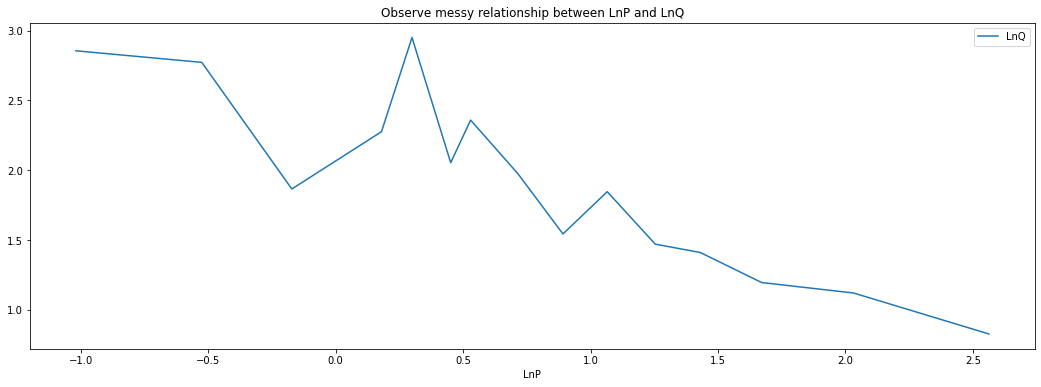

In [19]:
ols_fit = binned_ols(
    df_mdl,
    x='LnP',
    y='LnQ',
    n_bins=15,
    plot_title='Observe messy relationship between LnP and LnQ'
)

print(f'"Naive" elasticity estimated to be {ols_fit.params["LnP"]}')
ols_fit.summary()

#### 2.1.3 Â∞ùËØïÊç¢ÊàêÊüèÊùæÂõûÂΩíÂíåÊ≠£ÂàôÂåñÁöÑRidge‚ÄîOLSÂõûÂΩíÊñπÊ≥ï

ÊúÄÁªàÊüèÊùæÂõûÂΩí‰∏≠LnPÁöÑÂõûÂΩíÁ≥ªÊï∞‰∏∫ -2.87559ÔºåRidge‚ÄîOLSÂõûÂΩí‰∏≠LnPÁöÑÂõûÂΩíÁ≥ªÊï∞‰∏∫ -1.79945ÔºåÂ∞ùËØï‰∏ãÊù•ÂêÑ‰∏™ÊñπÊ≥ïÂæóÂà∞ÁöÑÁªìÊûúÂ∑ÆÂºÇÂæàÂ§ß„ÄÇ

In [20]:
import sklearn.preprocessing
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
feature_generator_basic = ColumnTransformer(
    [
        ('StockCode', OneHotEncoder(), ['StockCode']),
        ('Date', OneHotEncoder(), ['Date']),
        ('Country', OneHotEncoder(), ['Country']),
        ('LnP', 'passthrough', ['LnP']),
    ], remainder='drop'
)

mdl_basic = Pipeline([
    ('feat_proc', feature_generator_basic),
    ('reg', linear_model.PoissonRegressor(
        alpha=1e-6,  # l2 penalty strength; manually selected value for minimum interference on LnP-coef (elasticity)
        fit_intercept=False, # no need, since we have OneHot encodings without drop
        max_iter=100_000, 
    )),
], verbose=True)

mdl_basic_ols = Pipeline([
    ('feat_proc', feature_generator_basic),
    ('reg', linear_model.Ridge(
        alpha=1e-20,  # l2 penalty strength, "very small"
        fit_intercept=False, 
        max_iter=100_000, 
    )),
], verbose=True)

In [22]:
mdl_basic.fit(
    df_mdl[['LnP', 'StockCode', 'Date', 'Country']], 
    df_mdl['Quantity'] # Poisson regression has log-link, so LnQ is implicit in loss function
)

[Pipeline] ......... (step 1 of 2) Processing feat_proc, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing reg, total= 1.7min


Pipeline(steps=[('feat_proc',
                 ColumnTransformer(transformers=[('StockCode', OneHotEncoder(),
                                                  ['StockCode']),
                                                 ('Date', OneHotEncoder(),
                                                  ['Date']),
                                                 ('Country', OneHotEncoder(),
                                                  ['Country']),
                                                 ('LnP', 'passthrough',
                                                  ['LnP'])])),
                ('reg',
                 PoissonRegressor(alpha=1e-06, fit_intercept=False,
                                  max_iter=100000))],
         verbose=True)

In [23]:
mdl_basic_ols.fit(
    df_mdl[['LnP', 'StockCode', 'Date', 'Country']], 
    df_mdl['LnQ'] # log-normal
)

[Pipeline] ......... (step 1 of 2) Processing feat_proc, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing reg, total=   0.1s


Pipeline(steps=[('feat_proc',
                 ColumnTransformer(transformers=[('StockCode', OneHotEncoder(),
                                                  ['StockCode']),
                                                 ('Date', OneHotEncoder(),
                                                  ['Date']),
                                                 ('Country', OneHotEncoder(),
                                                  ['Country']),
                                                 ('LnP', 'passthrough',
                                                  ['LnP'])])),
                ('reg',
                 Ridge(alpha=1e-20, fit_intercept=False, max_iter=100000))],
         verbose=True)

In [24]:
print('"Econometrically" estimated elasticity with unit-, time-, and market- controls, using Poisson loss (coef on LnP):')
pd.DataFrame({
    'feat': mdl_basic['feat_proc'].get_feature_names(),
    'coef': mdl_basic['reg'].coef_
}).iloc[-1]

"Econometrically" estimated elasticity with unit-, time-, and market- controls, using Poisson loss (coef on LnP):


feat      LnP
coef   -2.978
Name: 3708, dtype: object

In [25]:
print('"Econometrically" estimated elasticity with unit-, time-, and market- controls, using log-Normal loss (coef on LnP):')
pd.DataFrame({
    'feat': mdl_basic_ols['feat_proc'].get_feature_names(),
    'coef': mdl_basic_ols['reg'].coef_
}).iloc[-1]

"Econometrically" estimated elasticity with unit-, time-, and market- controls, using log-Normal loss (coef on LnP):


feat       LnP
coef   -1.7711
Name: 3708, dtype: object

### 2.2 Êé•‰∏ãÊù•ÁÆóÈúÄÊ±ÇÈáè Q ÂØπ‰ª∑Ê†º P ÁöÑÂºπÊÄßÂÖ≥Á≥ª

ËøôÈáåÈááÁî® DMLÔºàDouble Machine LearningÔºâ ÊñπÊ≥ïËøõË°åÂõ†ÊûúÊé®Êñ≠ÔºåËØ•ÊñπÊ≥ï‰∏ªË¶ÅËß£ÂÜ≥‰∏§‰∏™ÈóÆÈ¢òÔºåÁ¨¨‰∏ÄÔºåÈÄöËøáÊ≠£ÂàôÂåñÊåëÊã£ÈáçË¶ÅÊéßÂà∂ÂèòÈáèÔºõÁ¨¨‰∫åÔºåÂØπÊØî‰º†ÁªüÁöÑÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÔºåÁî®ÈùûÂèÇÊï∞Êé®Êñ≠ÂèØ‰ª•Ëß£ÂÜ≥ÈùûÁ∫øÊÄßÈóÆÈ¢ò„ÄÇ

1. Â∞ÜÊï∞ÊçÆÂàÜ‰∏∫‰∏§ÈÉ®ÂàÜÔºå‰∏ÄÈÉ®ÂàÜÊ†∑Êú¨ÈÄâÁî®ÈöèÊú∫Ê£ÆÊûóÁ≠âÊ®°ÂûãÔºåÁî®Ê∑∑ÊùÇÂèòÈáèÈ¢ÑÊµãÂ§ÑÁêÜÂèòÈáèÔºà‰ª∑Ê†º PÔºâÔºåÂæóÂà∞ E[P|X]ÔºõÂè¶Â§ñÁöÑÊ†∑Êú¨ÂêåÊ†∑ÂèØÈÄâÊã©ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÔºåÁî®Ê∑∑ÊùÇÂèòÈáèÈ¢ÑÊµãÁªìÊûúÂèòÈáèÔºàÈúÄÊ±ÇÈáè QÔºâÔºåÂæóÂà∞ E[Q|X]„ÄÇ

2. ËÆ°ÁÆóÊÆãÂ∑ÆÔºåÂæóÂà∞‰∏çÂèóÊ∑∑ÊùÇÂèòÈáèÂΩ±ÂìçÁöÑ‰ª∑Ê†º P Âíå ÈúÄÊ±ÇÈáè QÔºåÂç≥‰∏∫ $\widetilde P , \widetilde Q$

$$\widetilde P = P-E[P|X]$$
$$\widetilde Q = Q-E[Q|X]$$

3. Âõ†Ê≠§Áõ¥Êé•Â∞Ü$\widetilde P , \widetilde Q$ ËøõË°å log-log ÂõûÂΩíÂ∞±ËÉΩÂæóÂà∞ÂºπÊÄßÁ≥ªÊï∞ $ùúÉ$

$$ÈúÄË¶ÅÂæóÂà∞ \theta=\frac{d_\widetilde Q/\widetilde Q}{d_\widetilde P/\widetilde P}$$

$$ÂÄíÊé®Áî®log-logÂõûÂΩíÂæóÂà∞ÂõûÂΩíÁ≥ªÊï∞ÔºåÂç≥log \widetilde Q ÔΩû \theta * log \widetilde P+ Êà™Ë∑ù$$

#### 2.2.1 Á¨¨‰∏ÄÊ≠•ÂÖàÂéªÂùáÂÄºÂåñ

Âõ†‰∏∫‰∏çÂêå‰∫ßÂìÅÁöÑÂçï‰ª∑Â∑ÆÂºÇÂæàÂ§ßÔºåÊâÄ‰ª•ÂØπ‰∫éÂêå‰∏ÄÁª¥Â∫¶ÁöÑÂçï‰ª∑ÈúÄË¶ÅÂáèÂéªËØ•Áª¥Â∫¶ÁöÑÂçï‰ª∑ÂùáÂÄº $dLnP_{i,t}=log(p_{i,t})-log(\overline p_{i})$ÔºåËøõ‰∏ÄÊ≠•ËÆ°ÁÆóÂæóÂà∞ $\theta=\frac{-0.122}{0.07}=-1.7$

In [26]:
df_mdl['dLnP'] = np.log(df_mdl.UnitPrice) - np.log(df_mdl.groupby('StockCode').UnitPrice.transform('mean'))
df_mdl['dLnQ'] = np.log(df_mdl.Quantity) - np.log(df_mdl.groupby('StockCode').Quantity.transform('mean'))

In [27]:
df_mdl[['dLnP', 'dLnQ']].cov()

dLnP      dLnQ
dLnP  0.069442 -0.122753
dLnQ -0.122753  1.279834

#### 2.2.2 Á¨¨‰∫åÊ≠•ËÆ°ÁÆóË°çÁîüÁâπÂæÅ

1. Â≠£ËäÇÊÄßÂèòÈáèÔºöËØ•‰ª∑Ê†ºÂ§Ñ‰∫éÁ¨¨Âá†Êúà„ÄÅÂ§Ñ‰∫éÊúàÈáåÁ¨¨Âá†Â§©ÂíåÂë®ÈáåÁ¨¨Âá†Â§©
2. ‰∫ßÂìÅ‰∏äÁ∫øÁöÑÊó∂ÈïøÔºöÁî®ÂΩìÊúüÊó∂Èó¥ÂáèÂéªËØ•‰∫ßÂìÅÁöÑÊúÄÂ∞èÊó∂Èó¥
3. sku ÁöÑ‰ª∑Ê†ºÊ∞¥Âπ≥ÔºöÂçï‰∏™skuÂÜÖÁöÑ‰ª∑Ê†º‰∏≠‰ΩçÊï∞

In [28]:
df_mdl = df_mdl.assign(
    month = lambda d: d.Date.dt.month,
    DoM =   lambda d: d.Date.dt.day,
    DoW =   lambda d: d.Date.dt.weekday,
    stock_age_days = lambda d: (d.Date - d.groupby('StockCode').Date.transform('min')).dt.days,
    sku_avg_p = lambda d: d.groupby('StockCode').UnitPrice.transform('median')
)

#### 2.2.3 Áî®Ê∑∑ÊùÇÂèòÈáèÈ¢ÑÊµã‰ª∑Ê†º P ÂíåÈúÄÊ±ÇÈáè Q

2.2.3.1 ËøôÈáåÁî®ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãËøõË°åÈ¢ÑÊµãÔºåÈ¢ÑÊµãÂâçÈúÄË¶ÅÂØπÁª¥Â∫¶ÂèòÈáèËøõË°åÁã¨ÁÉ≠ÁºñÁ†ÅÔºåÂØπÂ∫¶ÈáèÁâπÂæÅËøõË°åÂΩí‰∏ÄÂåñ

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
feature_generator_full = ColumnTransformer(
    [
        # do NOT include to reduce overfit (price is sku-level-demeaned anyway): 
        # ('StockCode', OneHotEncoder(), ['StockCode']), 
        ('Date', OneHotEncoder(), ['Date']),
        ('Description', CountVectorizer(min_df=0.0025, ngram_range=(1, 3)), 'Description'),
        ('Country', OneHotEncoder(), ['Country']),
        ('numeric_feats', StandardScaler(), ['month', 'DoM', 'DoW', 'stock_age_days', 'sku_avg_p']),
    ], remainder='drop'
)

In [31]:
model_y = Pipeline([
    ('feat_proc', feature_generator_full),
    ('model_y', RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, verbose=0)) 
    # n_samples_leaf/n_estimators is set to reduce model (file) size and runtime
    # larger models yield prettier plots.
])
model_t = Pipeline([
    ('feat_proc', feature_generator_full),
    ('model_t', RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, verbose=0))
])

In [32]:
import joblib

try: # load existing models, if possible
    model_y = joblib.load('models/step1_model_y.joblib')
    model_t = joblib.load('models/step1_model_t.joblib')
except:
    print('No pre-existing models found, fitting aux models for y and t')
    model_y.fit(df_mdl, df_mdl.dLnQ)
    model_t.fit(df_mdl, df_mdl.dLnP)
    
    joblib.dump(model_y, 'models/step1_model_y.joblib', compress=True)
    joblib.dump(model_t, 'models/step1_model_t.joblib', compress=True)

In [33]:
# Get first-step, predictions to residualize ("orthogonalize") with (in-sample for now)
q_hat = model_y.predict(df_mdl)
p_hat = model_t.predict(df_mdl)

2.2.3.2 Áî®ËßÇÊµãÂÄºÂáèÂéªÈ¢ÑÊµãÂæóÂà∞ÁöÑÂÄºÊ±ÇËß£ÊÆãÂ∑Æ

In [34]:
df_mdl = df_mdl.assign(
    dLnP_res = df_mdl['dLnP'] - p_hat,
    dLnQ_res = df_mdl['dLnQ'] - q_hat,
)

2.2.3.3 Áî®ÊÆãÂ∑ÆÊãüÂêàOLSÂõûÂΩíÊ®°ÂûãÂæóÂà∞ÂõûÂΩíÁ≥ªÊï∞‰∏∫ -1.819ÔºåÂíå‰πãÂâçÂéªÂùáÂÄºÂåñÂêéÁöÑolsÊ®°ÂûãÁªìÊûú -1.7 ÊØîËæÉÔºå‰∫åËÄÖÁöÑÊñúÁéáËøòÊòØÊúâ‰∏ÄÂÆöÁöÑÂ∑ÆÂºÇ

"Average" elasticity estimated using DML (now supposedly valid estimate!) to be -1.820
Note that this is close to our econometric contols - some difference comes from the different distribution assumptions (Poisson vs. log-normal)


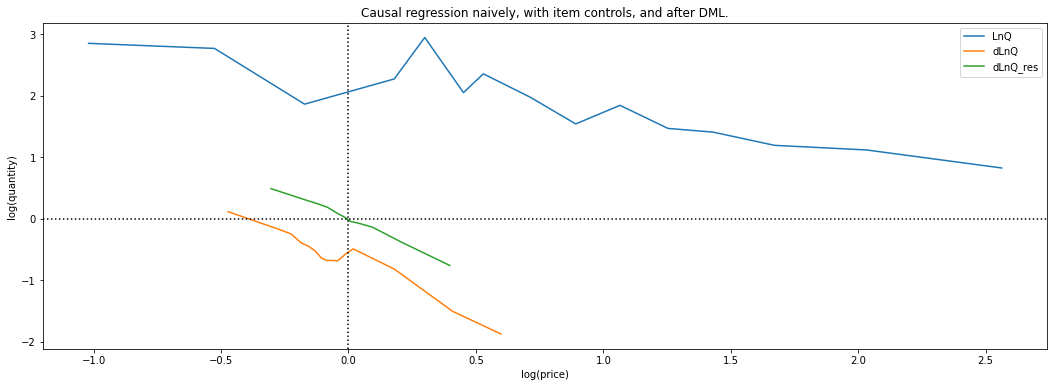

In [35]:
# ÂàùÂßãolsÊ®°Âûã
old_fit = binned_ols(
    df_mdl,
    x='LnP',
    y='LnQ',
    n_bins=15,
)
# ÂàùÂßãÂéªÂùáÂÄºÂåñÂêéÁöÑolsÊ®°Âûã
old_fit = binned_ols(
    df_mdl,
    x='dLnP',
    y='dLnQ',
    n_bins=15,
    plot_ax=plt.gca(),
)
# ÊÆãÂ∑ÆÊãüÂêàÁöÑolsÊ®°Âûã
old_fit = binned_ols(
    df_mdl,
    x='dLnP_res',
    y='dLnQ_res',
    n_bins=15,
    plot_title='Causal regression naively, with item controls, and after DML.',
    plot_ax=plt.gca()
)
plt.gca().set(
    xlabel='log(price)',
    ylabel='log(quantity)',    
)

plt.gca().axvline(0, color='k', linestyle=':')
plt.gca().axhline(0, color='k', linestyle=':')


print(
    f'"Average" elasticity estimated using DML (now supposedly valid estimate!) to be {old_fit.params["dLnP_res"]:.3f}\n'
    'Note that this is close to our econometric contols - some difference comes from the different distribution '
    'assumptions (Poisson vs. log-normal)'
)

In [36]:
def get_feat_generator_names(gen):
    # workaround to sklearn native .get_feature_names() failing
    # because StandardScaler strangely doesn't implement it
    res = []
    for i, (k, t) in enumerate(gen.named_transformers_.items()):
        if k == 'remainder':
            continue
        try: 
            res += [f'{k}_{n}' for n in t.get_feature_names()]
        except:
            res += list(gen.transformers_[i][2])
    return res

<AxesSubplot:title={'center':'feature importances for DML estimators of treatment(p) and outcome(q)'}, ylabel='feat'>

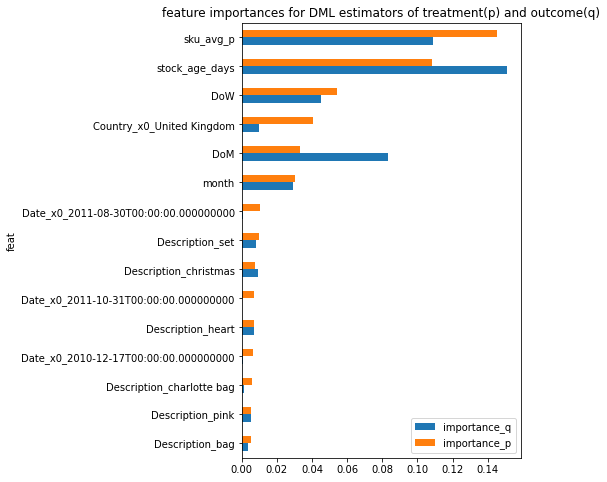

In [37]:
feat_imp = pd.DataFrame({
    'feat': get_feat_generator_names(model_y['feat_proc']),
    'importance_q': model_y['model_y'].feature_importances_,
    'importance_p': model_t['model_t'].feature_importances_,
}).set_index('feat')

feat_imp.sort_values(by='importance_p').iloc[-15:].plot.barh(
    figsize=(5, 8), 
    title='feature importances for DML estimators of treatment(p) and outcome(q)'
)

#### 2.2.4 K-Fold Á®≥ÂÅ•ÊÄßÁªìÊûú

Ê®°ÂûãÁöÑÈ¢ÑÊµãÊé®Êñ≠ÁªìÊûúÊòØ $\hat \theta=\frac{dLnQ_{res}}{dLnP_{res}}$Ôºå‰ΩÜÊòØÊÆãÂ∑ÆÊ≠£‰∫§ÂåñÂêéÔºå$dLnP_{res}$ ÊÄªÊòØÂæàÂ∞èÔºåÂõ†Ê≠§‰∏∫‰∫ÜÂáèÂ∞ëÂô™Èü≥ÔºåÊàë‰ª¨Â∞Ü‰∏¢ÂºÉÊâÄÊúâÈùûÂ∏∏Â∞èÁöÑ‰ª∑Ê†ºÂèòÂåñËßÇÂØüÂÄºÔºåÂÆÉ‰ª¨‰∏çÂåÖÂê´Â§™Â§ö‰ø°ÊÅØ„ÄÇChernozhukov ÊèêÂá∫‰∫Ü‰∏Ä‰∏™ÊîπËøõÁöÑ DMLÔºå‰º†ÁªüÁöÑÊ†áÂáÜ OLS ÊñπÊ≥ï‰º∞ËÆ°$\hat \theta=(\widetilde P^T  \widetilde P)^{-1}\widetilde P^T \widetilde Q$Ôºå‰ΩÜÊîπËøõÁöÑ 
$\hat \theta=(\widetilde P^T P)^{-1}\widetilde P^T \widetilde Q^T$ÔºåÂç≥Á¨¨‰∫å‰∏™ P Áü©ÈòµÁî®Êú™ÊÆãÂ∑ÆÂåñÁöÑ„ÄÇ

ÊúÄÂêéÈááÂèñ 2-fold ÂæóÂà∞Âπ≥ÂùáÂÄº‰ΩøÂæóÁªìÊûúÊõ¥Á®≥ÂÅ•ÔºåÊúÄÁªàÂºπÊÄßÁ≥ªÊï∞ÁªìÊûú‰∏∫ -1.89

In [38]:
from sklearn.model_selection import KFold

fitting model_y
fitting model_t
DML elast:  -1.895475650066915
OLS elasticity for comparison: -1.8343484758337214
fitting model_y
fitting model_t
DML elast:  -1.8848008445530626
OLS elasticity for comparison: -1.8369864792500255
DML efficient estimate of elasticity: -1.8901382473099888


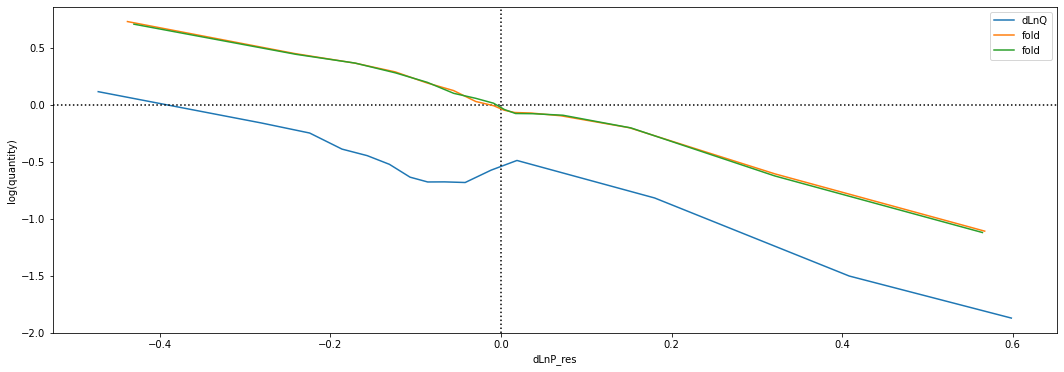

In [39]:
old_fit = binned_ols(
    df_mdl,
    x='dLnP',
    y='dLnQ',
    n_bins=15,
    plot_ax=plt.gca(),
)
plt.gca().set(
    xlabel='log(price)',
    ylabel='log(quantity)',    
)
plt.gca().axvline(0, color='k', linestyle=':')
plt.gca().axhline(0, color='k', linestyle=':')


elast_estimates = list()
for idx_aux, idx_inf in KFold(n_splits=2, shuffle=True).split(df_mdl):
    
    df_aux = df_mdl.iloc[idx_aux]
    df_inf = df_mdl.iloc[idx_inf].copy()
    
    # step 1: aux models and residualize in inferential set
    print('fitting model_y')
    model_y.fit(df_aux, df_aux.dLnQ)
    print('fitting model_t')
    model_t.fit(df_aux, df_aux.dLnP)
    
    df_inf = df_inf.assign(
        dLnP_res = df_inf['dLnP'] - model_t.predict(df_inf),
        dLnQ_res = df_inf['dLnQ'] - model_y.predict(df_inf),
    )
    
    binned_ols(
        df_inf,
        x='dLnP_res',
        y='dLnQ_res',
        n_bins=15,
        plot_ax=plt.gca(),
        label='fold'
    )
    
    # ignore observations where we residualized away all variation in price
    mask = (~(df_inf.dLnP_res.abs() < 0.01))
    df_inf_censored = df_inf[mask]
    
    # step 2.1: Chernozhukov DML inference
    elast = (
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnQ_res'])
        /
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnP'])
        # the last part here deviates from standard OLS solution
    )
    
    print('DML elast: ', elast)
    elast_estimates.append(elast)

    print('OLS elasticity for comparison:',
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnQ_res'])
        /
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnP_res'])
    )    

print("DML efficient estimate of elasticity:", np.mean(elast_estimates))